In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = pd.read_csv('home_data.csv')

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

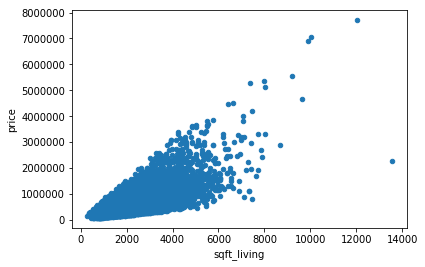

In [4]:
sales.plot.scatter(x='sqft_living', y='price')

# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [5]:
features = ['sqft_living']
X = sales[features]
y = sales['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Build the regression model using only sqft_living as a feature

In [6]:
sqft_model = LR().fit(X_train, y_train)

# Evaluate the simple model

In [7]:
yhat = sqft_model.predict(X_test)
mse = mean_squared_error(y_pred=yhat, y_true=y_test)
rmse = np.sqrt(mse)
print(rmse)

248879.06143647007


# Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

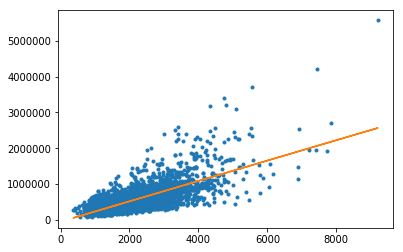

In [8]:
plt.plot(X_test, y_test,'.', X_test, yhat,'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [9]:
sqft_model.coef_

array([283.96855737])

# Explore other features in the data

To build a more elaborate model, we will explore using more features.

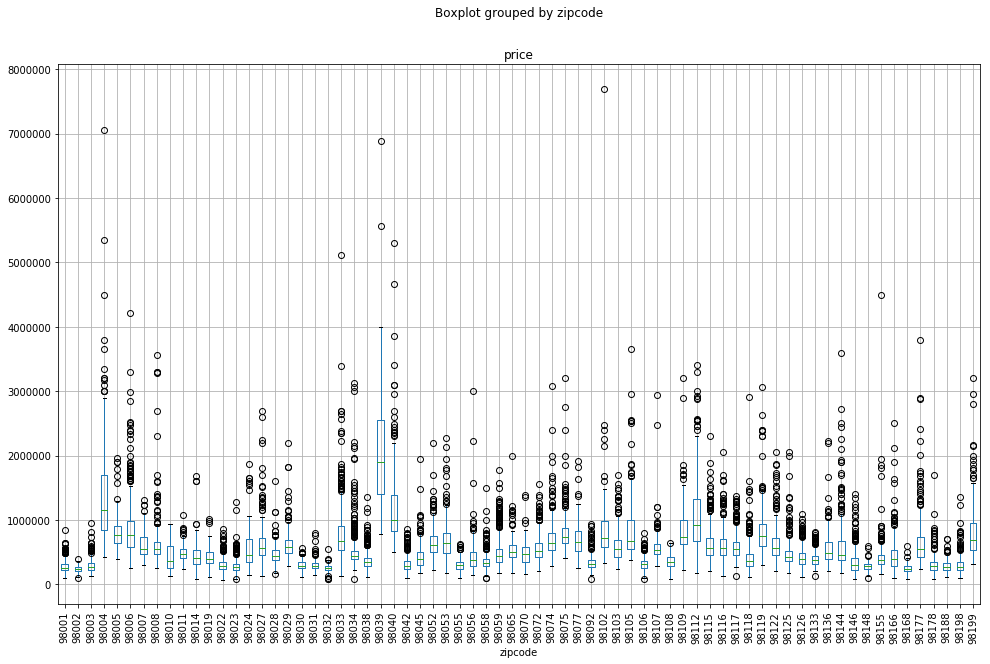

In [10]:
sales.boxplot(by='zipcode', column='price', figsize=(16, 10), rot=90)

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

# Build a regression model with more features

In [11]:
lr_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
X = sales[lr_features]
y = sales['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
lr_model = LR().fit(X_train, y_train)
yhat = lr_model.predict(X_test)
mse = mean_squared_error(y_pred=yhat, y_true=y_test)
rmse = np.sqrt(mse)
print(rmse)

244004.77443104205


In [13]:
lr_model.coef_

array([-5.66006330e+04,  1.10870936e+04,  3.20408369e+02, -2.89499140e-01,
       -2.41800491e+03,  6.17971071e+02])

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [14]:
house = sales.loc[sales.id==5309101200]
print(house.price)
print(sqft_model.predict(house[features]))
print(lr_model.predict(house[lr_features]))

1054    620000
Name: price, dtype: int64
[633267.47422744]
[637556.26515922]


## Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [15]:
house = sales.loc[sales.id==1925069082]
print(house.price)
print(sqft_model.predict(house[features]))
print(lr_model.predict(house[lr_features]))

1361    2200000
Name: price, dtype: int64
[1269357.04273158]
[1274443.76531342]


In [16]:
sales.groupby(by=['zipcode']).mean().reset_index().sort_values(by='price', ascending=False).head(3)

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
24,98039,3.755708e+09,2.160607e+06,4.060000,3.200000,3800.900000,17403.560000,1.560000,0.020000,0.440000,3.480000,9.560000,3290.900000,510.000000,1972.520000,398.600000,47.625840,-122.233540,3132.200000,17291.100000
3,98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,3.495268,8.687697,2419.842271,489.179811,1971.470032,208.145110,47.616183,-122.205189,2674.700315,12805.022082
25,98040,4.199323e+09,1.194230e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.042553,0.783688,3.787234,8.960993,2474.329787,632.503546,1971.471631,233.574468,47.559846,-122.225592,2898.744681,12801.283688


In [17]:
mask = (sales.sqft_living > 2000) & (sales.sqft_living < 4000)
len(sales[mask].index) / len(sales.index)

0.4215518437977143